# Distribution Plots

This notebook provides visualizations of the distribution of key features in the dataset:
1. **IC50 Distribution**: The distribution of IC50 values across the dataset.
2. **Cell Lines per Drug**: The number of cell lines tested per drug.

These distributions help to understand the variability in the data and identify any imbalances or issues in the dataset.

In [1]:
import os
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load final dataset
final_data = pl.read_parquet("../../data/processed/gdsc_final_cleaned.parquet")

# Create a directory to store statistics if it doesn't exist
output_dir = "statistics"
os.makedirs(output_dir, exist_ok=True)


## Distribution of Log IC50 Values

We plot the overall distribution of log-transformed IC50 values across all cell line–drug combinations.


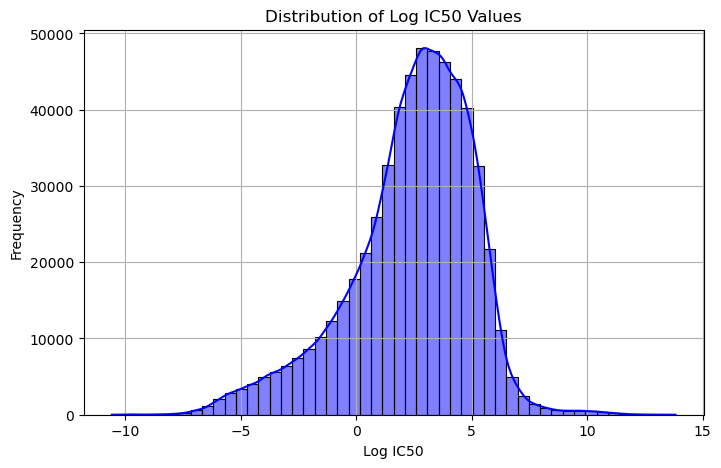

In [3]:
# Distribution of IC50 values
plt.figure(figsize=(8, 5))
sns.histplot(final_data["LN_IC50"], bins=50, kde=True, color="blue")
plt.xlabel("Log IC50")
plt.ylabel("Frequency")
plt.title("Distribution of Log IC50 Values")
plt.grid()
plt.savefig(f"{output_dir}/ic50_distribution.png")
plt.show()
plt.close()


## Distribution of Number of Cell Lines per Drug

Here we count how many unique cell lines were tested with each drug and visualize the distribution.


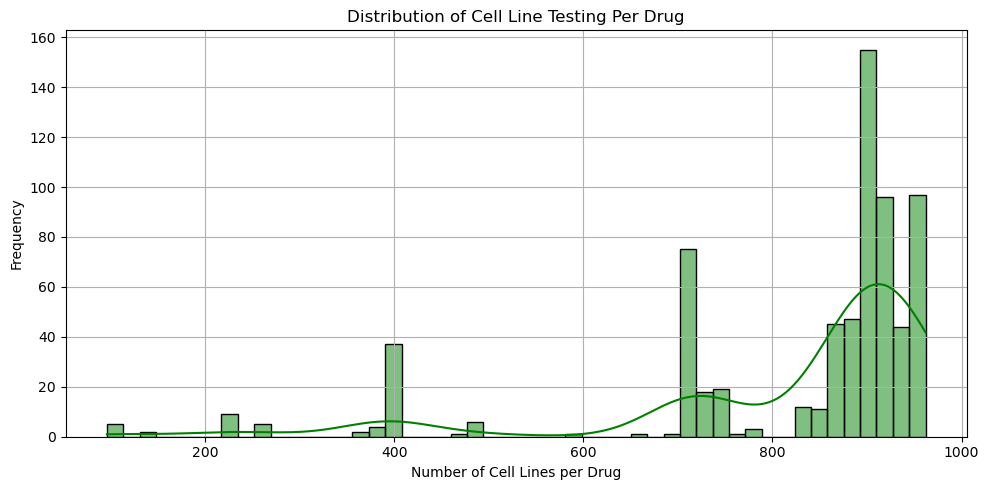

In [4]:
# Count unique cell lines per drug using Polars
drug_counts = final_data.group_by("DRUG_ID").agg(
    pl.col("SANGER_MODEL_ID").n_unique().alias("n_cell_lines")
).sort("n_cell_lines", descending=True)

# Convert to pandas for plotting
drug_counts_pd = drug_counts.to_pandas()

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(drug_counts_pd["n_cell_lines"], bins=50, kde=True, color="green")
plt.xlabel("Number of Cell Lines per Drug")
plt.ylabel("Frequency")
plt.title("Distribution of Cell Line Testing Per Drug")
plt.grid()
plt.tight_layout()
plt.savefig(f"{output_dir}/cell_lines_per_drug.png")
plt.show()
plt.close()


### Conclusion

We have visualized the distribution of IC50 values and the number of cell lines tested per drug. These visualizations help identify potential imbalances in drug testing or issues with IC50 distribution.

- **Next Steps**: Move on to correlation analysis to examine the relationship between genes and IC50 values.
